In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import visual_behavior_glm
import visual_behavior_glm.GLM_params as glm_params
import visual_behavior_glm.GLM_analysis_tools as gat

import visual_behavior.data_access.loading as loading

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### get experiments_table

In [3]:
experiments_table = loading.get_filtered_ophys_experiment_table()

In [4]:
experiments_table.head()

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_225,True,2
953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_150,True,2
953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_75,True,2
953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_225,True,2
958527485,954954402,953982960,1018028351,VisualBehaviorMultiscope,container_qc,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISl_75,True,3


#### load directly from file

In [5]:
# filepath = r"C:\Users\marinag\Dropbox\GLM\filtered_ophys_experiment_table.csv"
# experiments_table = pd.read_csv(filepath)
# experiments_table = experiments_table.set_index('ophys_experiment_id')

In [6]:
# experiments_table.head()

## get results for glm version 9a

In [7]:
model_output_type = 'adj_fraction_change_from_full'
glm_version = '9a_L2_optimize_by_session'

rspm = gat.build_pivoted_results_summary(value_to_use=model_output_type, results_summary=None, 
                                       glm_version=glm_version, cutoff=0.01)

#### save & load directly from file

In [8]:
# # save
# save_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\GLM'
# rspm.to_hdf(os.path.join(save_dir, glm_version+'_'+model_output_type+'.h5'), key='df')

In [9]:
# # load
# load_dir = r'C:\Users\marinag\Dropbox\GLM'
# filepath = os.path.join(load_dir, glm_version+'_'+model_output_type+'.h5')
# rspm = pd.read_hdf(filepath, key='df')

In [10]:
rspm.head()

,identifier,Full,all-images,beh_model,behavioral,cognitive,correct_rejects,expectation,face_motion_PC_0,face_motion_PC_1,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
0,1000743008_1003146172,0.0,-0.131169,-0.003489,-0.251514,-0.025145,-0.009547,-0.057581,-0.053424,-0.005941,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
1,1000743008_1003146180,0.0,-0.172658,0.000000,0.000000,-0.006048,0.000000,-0.066927,0.000000,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
2,1000743008_1003146183,0.0,-0.256476,0.000000,-0.136978,-0.011285,0.000000,-0.046704,-0.016123,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
3,1000743008_1003146186,0.0,-0.413599,0.000000,0.000000,0.000000,0.000000,-0.040592,-0.000053,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
4,1000743008_1003146190,0.0,-0.097979,-0.001260,-0.053031,-0.013947,0.000000,-0.053520,-0.036129,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1


#### select regressors to evaluate

In [11]:
features_to_plot = [col for col in rspm.columns if col not in ['identifier','cre_line','session_type','equipment_name', 
                                                                  'session_id', 'imaging_depth','project_code','session_number','exposure_number']]
features_to_plot = [col for col in features_to_plot if col not in ['image0','image1','image2','image3',
                                                                         'image4','image5','image6','image7',
                                                                         'Full']]
features_to_plot = [col for col in features_to_plot if 'single' not in col]

features_to_plot

['all-images',
 'beh_model',
 'behavioral',
 'cognitive',
 'correct_rejects',
 'expectation',
 'face_motion_PC_0',
 'face_motion_PC_1',
 'face_motion_PC_2',
 'face_motion_PC_3',
 'face_motion_PC_4',
 'face_motion_energy',
 'false_alarms',
 'hits',
 'image_expectation',
 'intercept',
 'licking',
 'licks',
 'misses',
 'model_bias',
 'model_omissions1',
 'model_task0',
 'model_timing1D',
 'omissions',
 'passive_change',
 'pupil',
 'pupil_and_omissions',
 'pupil_and_running',
 'running',
 'running_and_omissions',
 'task',
 'time',
 'visual',
 'variance_explained_full',
 'cell_specimen_id',
 'glm_version',
 'ophys_experiment_id',
 'ophys_session_id',
 'behavior_session_id',
 'container_id',
 'container_workflow_state',
 'experiment_workflow_state',
 'session_name',
 'date_of_acquisition',
 'isi_experiment_id',
 'specimen_id',
 'sex',
 'age_in_days',
 'full_genotype',
 'reporter_line',
 'driver_line',
 'targeted_structure',
 'published_at',
 'super_container_id',
 'session_tags',
 'failure_t

In [12]:
features_to_plot = [
 'visual',
 'all-images',
 'omissions',
 'behavioral',
 'licking',
 'licks',
 'pupil',
 'running',
 'face_motion_energy',
 'face_motion_PC_0',
 'face_motion_PC_1',
 'face_motion_PC_2',
 'face_motion_PC_3',
 'face_motion_PC_4',
 'cognitive',
 'image_expectation',
 'hits',
 'misses',
 'false_alarms',
 'correct_rejects',
 'intercept',
 'beh_model',
 'model_bias',
 'model_omissions1',
 'model_task0',
 'model_timing1D',
 'task',
 'time',
 ]

In [59]:
level_up_features = [
'visual',
'all-images',
'omissions',
'behavioral',
'task',
'beh_model',
 ]

In [14]:
len(features_to_plot)

28

### plot stuff

In [15]:
def plot_feature_matrix(pivoted_results_summary, model_output_type, glm_version, features_to_plot=None, sort_by=None, ax=None, save_figure=False):
    if ax is None: 
        figsize = (10,10)
        fig, ax = plt.subplots(figsize=figsize)
    if features_to_plot is None: 
        params = glm_params.define_kernels()
        params = list(params.keys())
        params.remove('each-image')
        features_to_plot = list(np.sort(np.hstack((params,'all-images'))))
        features = 'default_features'
    else: 
        features = 'custom_features'
    if sort_by is not None: 
        feature_matrix = pivoted_results_summary.sort_values(sort_by).reset_index()[features_to_plot]
    else:
        feature_matrix = pivoted_results_summary[features_to_plot]
        sort_by = ''
    ax = sns.heatmap(feature_matrix, vmin=-0.5, vmax=0, center=0, cmap='RdBu_r', ax=ax, cbar_kws={'label':model_output_type})
    ax.set_ylabel('cells')
    ax.set_title('GLM feature matrix')
    if save_figure: 
        import visual_behavior.visualization.utils as ut
        save_dir = os.path.join(loading.get_ophys_glm_dir(), 'v_'+glm_version, 'figures')
        ut.save_figure(fig, figsize, save_dir, 'feature_matrix_heatmaps', 'glm_feature_matrix_'+glm_version+'_sort_by_'+sort_by+'_'+features)
    return ax

In [16]:
rspm.head()

,identifier,Full,all-images,beh_model,behavioral,cognitive,correct_rejects,expectation,face_motion_PC_0,face_motion_PC_1,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
0,1000743008_1003146172,0.0,-0.131169,-0.003489,-0.251514,-0.025145,-0.009547,-0.057581,-0.053424,-0.005941,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
1,1000743008_1003146180,0.0,-0.172658,0.000000,0.000000,-0.006048,0.000000,-0.066927,0.000000,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
2,1000743008_1003146183,0.0,-0.256476,0.000000,-0.136978,-0.011285,0.000000,-0.046704,-0.016123,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
3,1000743008_1003146186,0.0,-0.413599,0.000000,0.000000,0.000000,0.000000,-0.040592,-0.000053,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
4,1000743008_1003146190,0.0,-0.097979,-0.001260,-0.053031,-0.013947,0.000000,-0.053520,-0.036129,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1


In [17]:
def plot_feature_matrix(pivoted_results_summary, value_to_use, glm_version, features_to_plot=None, sort_by=None, ax=None, save_figure=False):
    """
    Plots a heatmap of GLM features from the pivoted_results_summary for a given glm_version

    :param pivoted_results_summary: output of GLM_analysis_tools.build_pivoted_results_summary(), with value_to_use such as 'adj_fraction_change_from_full'
    :param value_to_use: model output type used to create pivoted_results_summary, such as 'adj_fraction_change_from_full'
    :param glm_version: string of GLM version, ex: '7_L2_optimize_by_session'
    :param features_to_plot: list of GLM features to include in the plot. If None provided, will select defaults from GLM_params.define_kernels()
    :param sort_by: GLM feature to sort by, such as 'omissions', or 'Full'
    :param ax: axis to plot, if None provided, figure will be created
    :param save_figure: if True, figure will be saved to a default location with figure title reflecting customized inputs to function
    :return: figure axis
    """
    if ax is None:
        figsize = (10,10)
        fig, ax = plt.subplots(figsize=figsize)
    if features_to_plot is None:
        import visual_behavior_glm.GLM_params as glm_params
        params = glm_params.define_kernels()
        params = list(params.keys())
        params.remove('each-image')
        features_to_plot = list(np.sort(np.hstack((params,'all-images'))))
        features = 'default_features'
    else:
        features = 'custom_features'
    if sort_by is not None:
        feature_matrix = pivoted_results_summary.sort_values(sort_by).reset_index()[features_to_plot]
    else:
        feature_matrix = pivoted_results_summary[features_to_plot]
        sort_by = ''
    ax = sns.heatmap(feature_matrix, vmin=-0.5, vmax=0, center=0, cmap='RdBu_r', ax=ax, cbar_kws={'label':value_to_use})
    ax.set_ylabel('cells')
    ax.set_title('GLM feature matrix')
    if save_figure:
        import visual_behavior.visualization.utils as ut
        save_dir = os.path.join(loading.get_ophys_glm_dir(), 'v_'+glm_version, 'figures')
        ut.save_figure(fig, figsize, save_dir, 'feature_matrix_heatmaps', 'glm_feature_matrix_'+glm_version+'_sort_by_'+sort_by+'_'+features)
    return ax

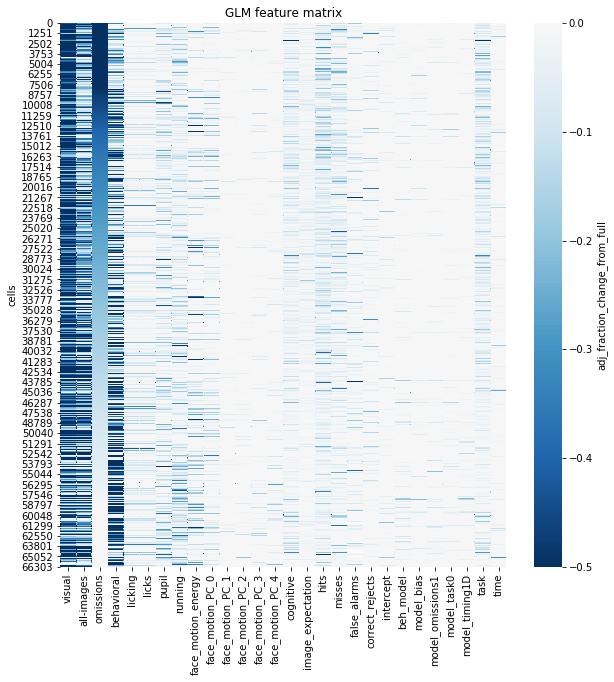

In [18]:
plot_feature_matrix(rspm, model_output_type, glm_version, features_to_plot=features_to_plot, sort_by='omissions', ax=None, save_figure=True)

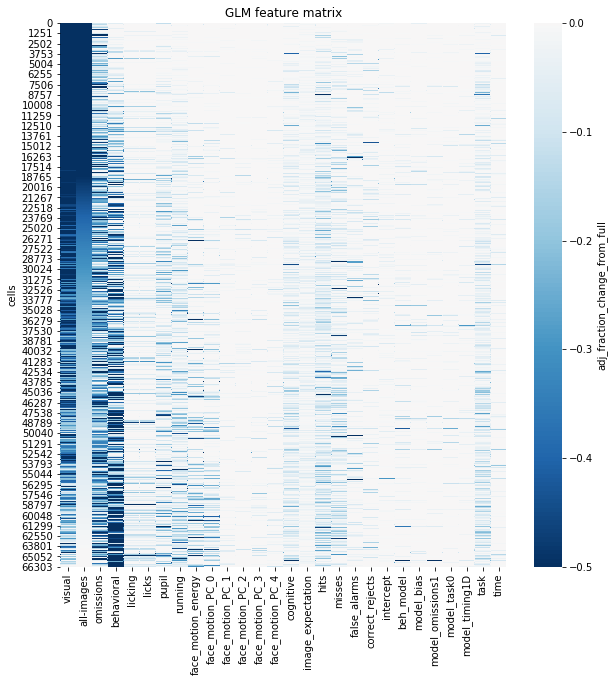

In [19]:
plot_feature_matrix(rspm, model_output_type, glm_version, features_to_plot=features_to_plot, sort_by='all-images', ax=None, save_figure=True)

### limited colums 

Text(0.5, 1, 'GLM feature matrix')

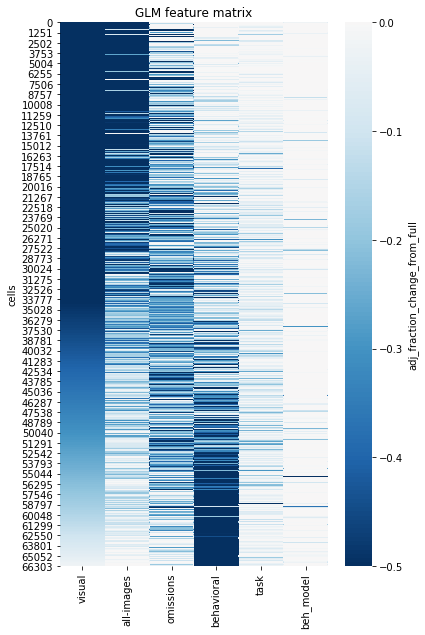

In [60]:
feature_matrix = rspm.sort_values('visual').reset_index()[level_up_features]
fig, ax = plt.subplots(figsize=(6,10))
ax = sns.heatmap(feature_matrix, vmin=-0.5, vmax=0, center=0, cmap='RdBu_r', ax=ax, cbar_kws={'label':model_output_type})
ax.set_ylabel('cells')
ax.set_title('GLM feature matrix')

### plot single cell feature vectors across sessions

In [21]:
df = rspm[rspm.project_code.isin(['VisualBehavior', 'VisualBehaviorTask1B'])]

In [22]:
cell_specimen_ids = df.cell_specimen_id.unique()

In [23]:
cre_lines = df.cre_line.unique()

In [24]:
matched_cells = [cell_specimen_id for cell_specimen_id in cell_specimen_ids if len(df[df.cell_specimen_id==cell_specimen_id])>=3]

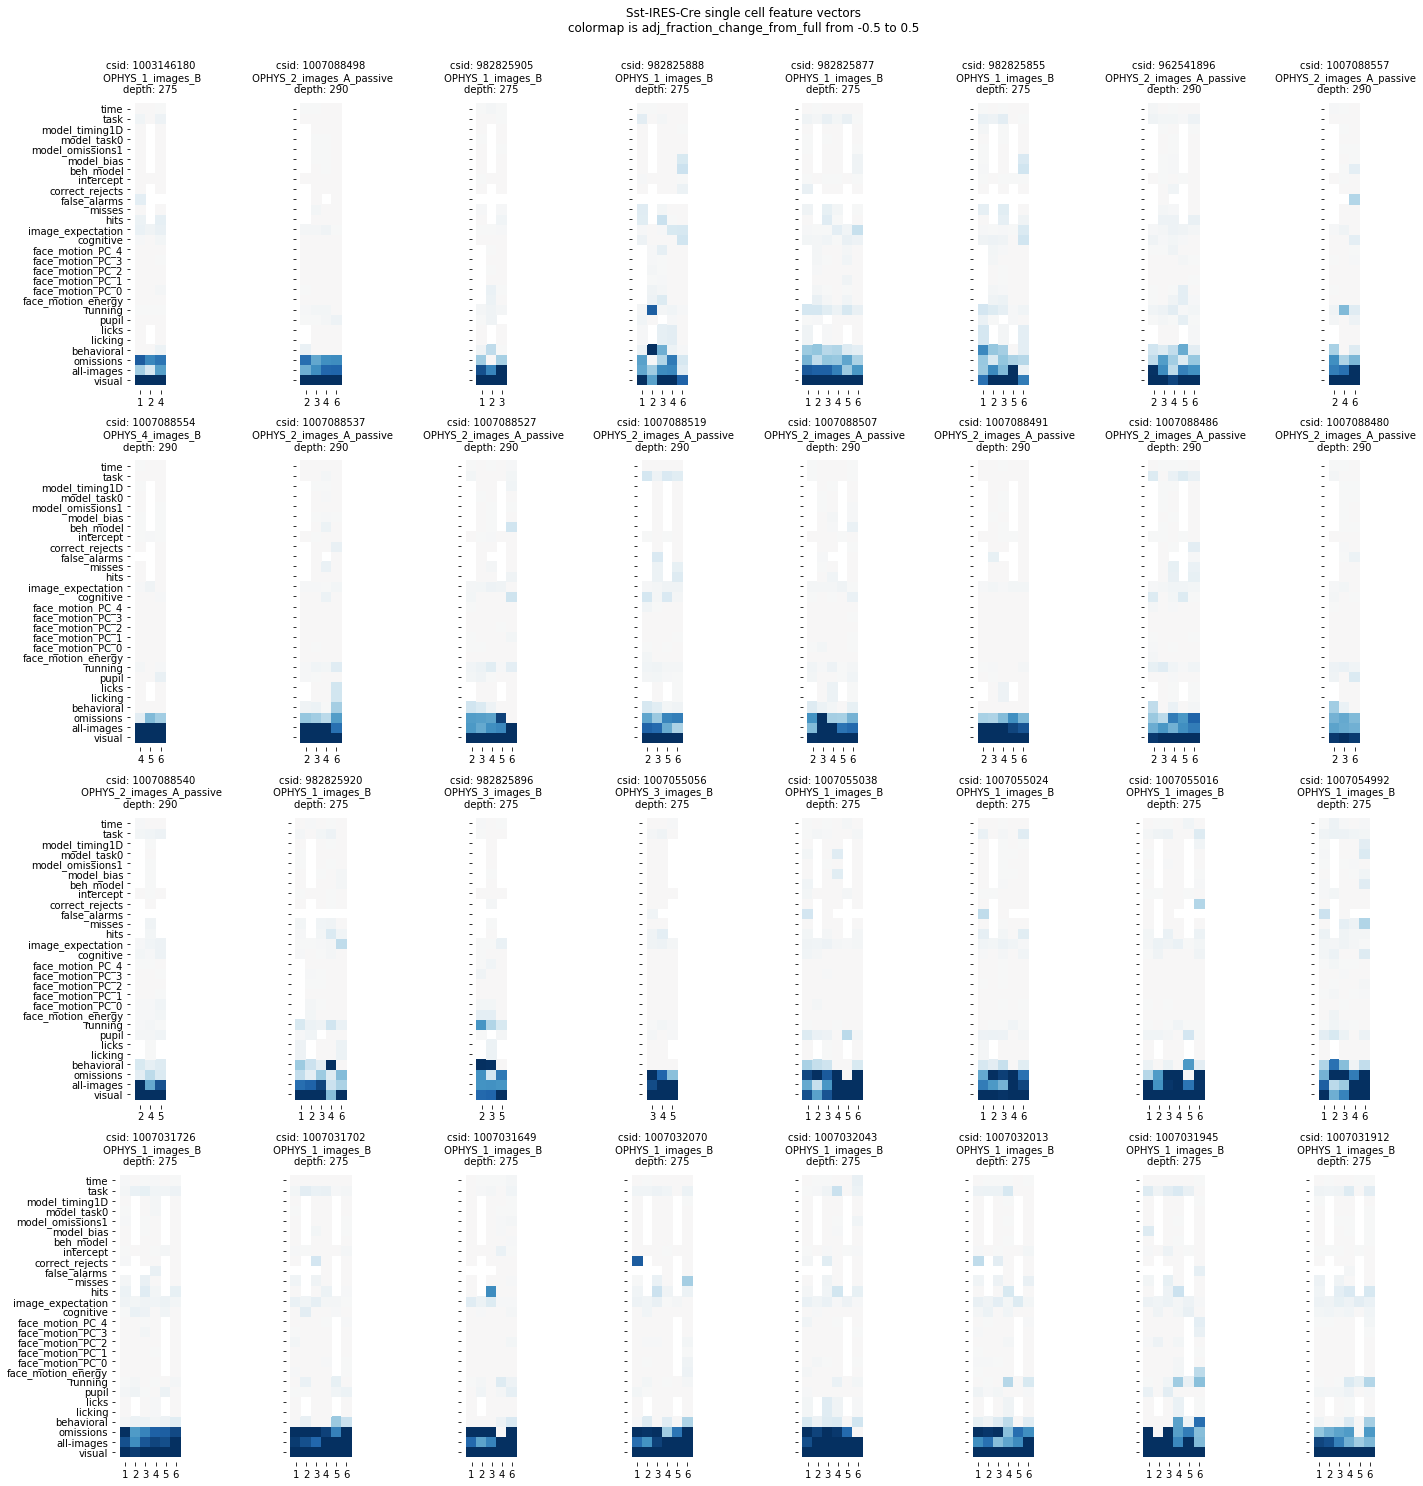

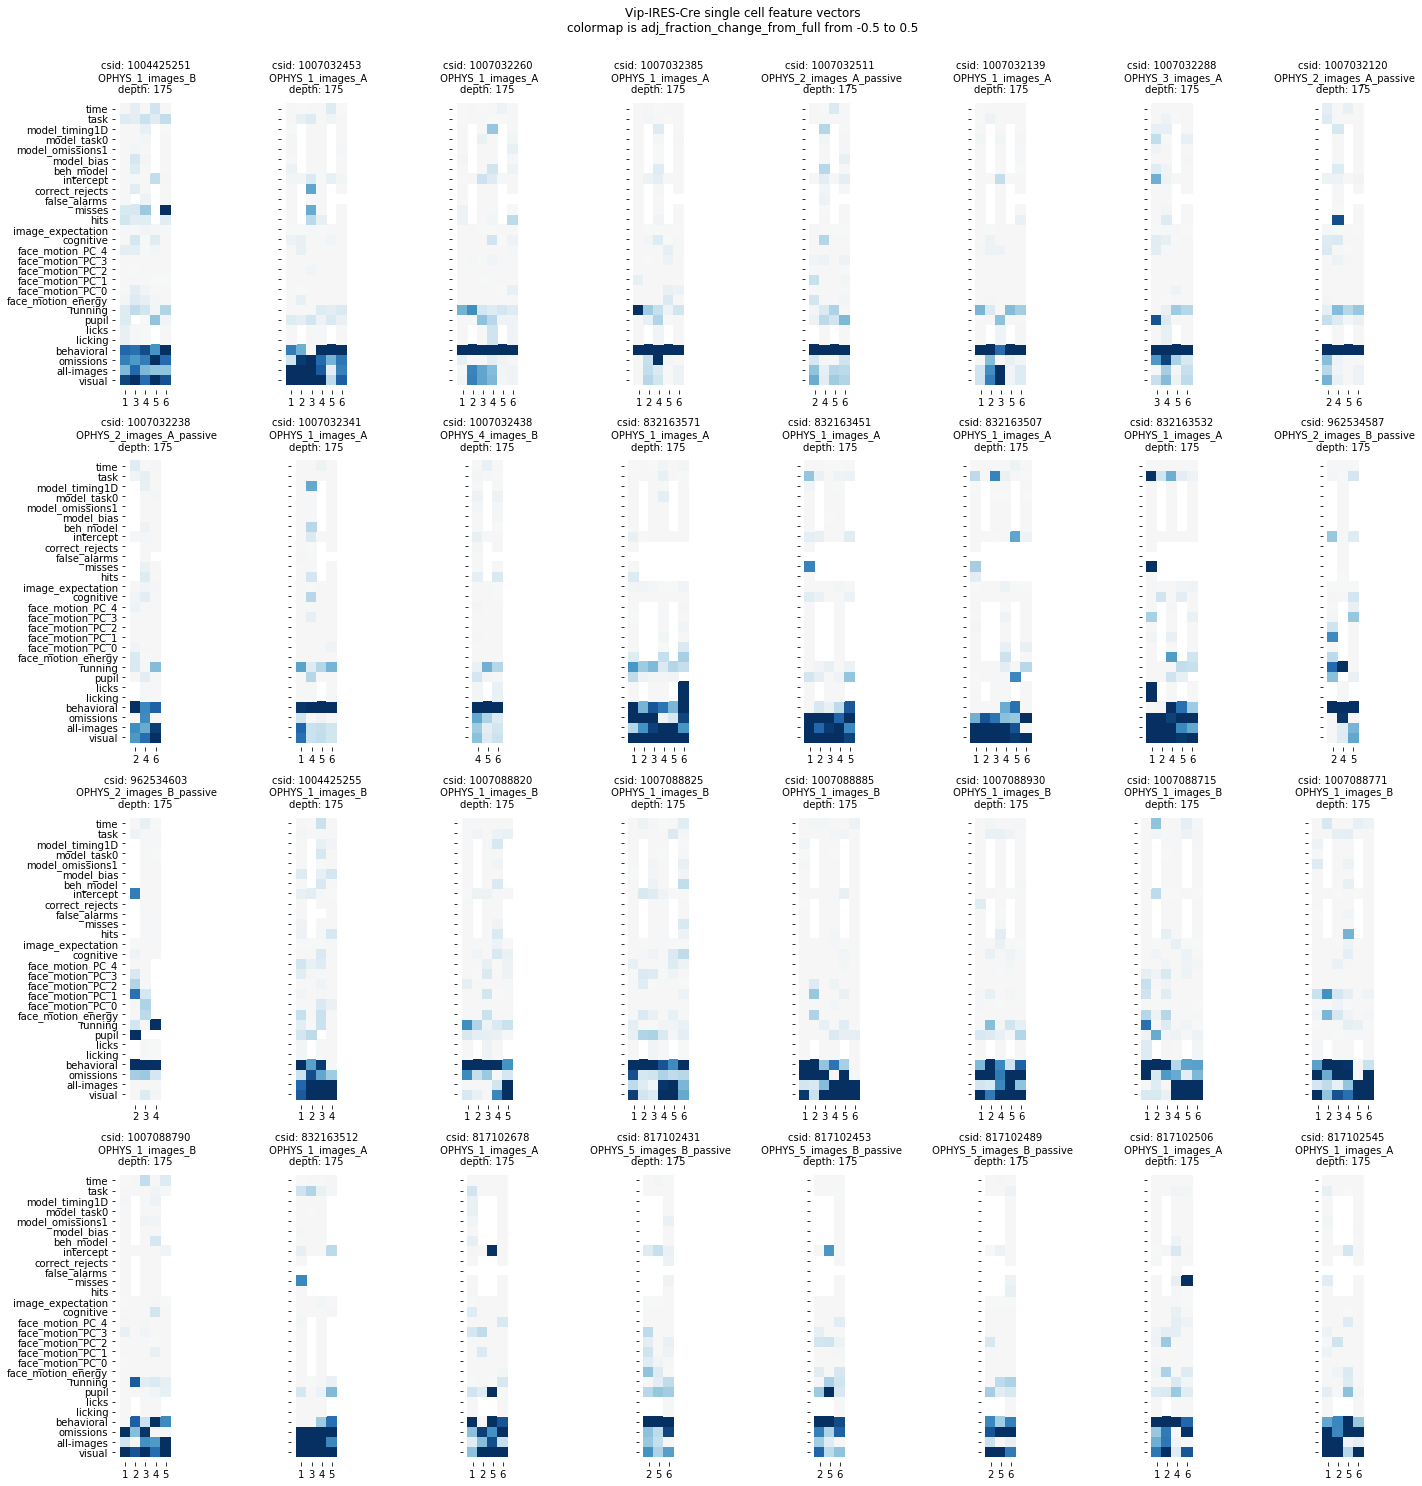

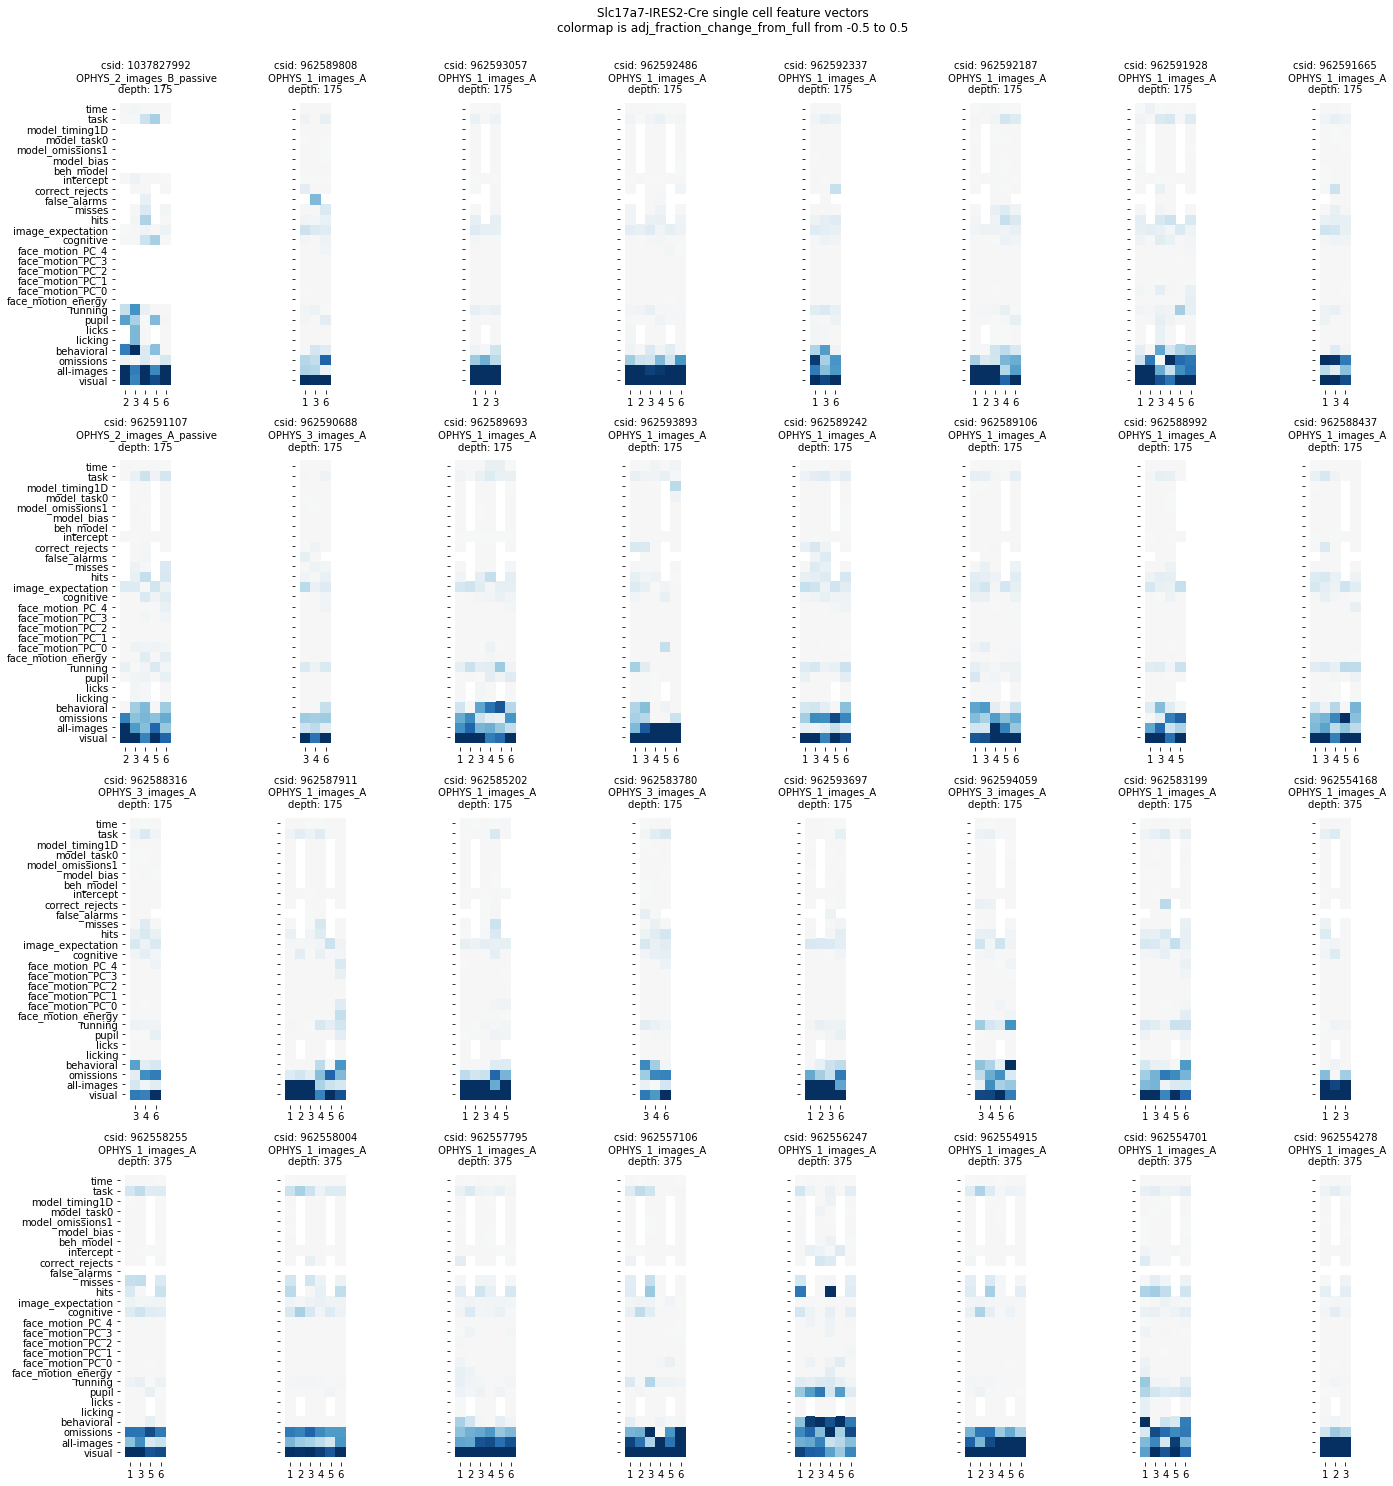

In [25]:
session_numbers = np.sort(df.session_number.unique())

for cre_line in cre_lines: 
    nrows = 4 
    ncols = 8
    fig, ax = plt.subplots(nrows,ncols, figsize=(20,20), sharey=True)
    ax = ax.ravel()
    cre_df = df[df.cell_specimen_id.isin(matched_cells)&(df.cre_line==cre_line)]
    cre_df = cre_df.sort_values(by='Full', ascending=False) #sort by overall varience explained in full model
    cre_matched_cells = cre_df.cell_specimen_id.unique()

    for i,cell_specimen_id in enumerate(cre_matched_cells[:(nrows*ncols)]):
        cdf = df[df.cell_specimen_id==cell_specimen_id]
        ax[i] = sns.heatmap(data=cdf.set_index('session_number')[features_to_plot].sort_values(by='session_number').T, 
                            vmin=-0.5, vmax=0.5, cmap='RdBu_r', square=True, ax=ax[i], cbar=False)
        ax[i].set_xlim(-0.5,len(cdf)+0.5)
        ax[i].set_xlabel('')
        ax[i].set_ylim(-0.5,len(features_to_plot)+0.5)
        ax[i].set_yticks(np.arange(0.5,len(features_to_plot)+0.5,1))
        ax[i].set_yticklabels(features_to_plot)
        ax[i].set_title('csid: '+str(cell_specimen_id)+'\n '+cdf.session_type.values[0]+'\ndepth: '+str(int(cdf.imaging_depth.mean())), fontsize=10)

#     for y in np.arange(0,nrows*ncols,ncols):
#         ax[y].set_xlabel('session #', fontsize=10)

#     for x in range(nrows):
#         ax[(nrows*ncols-x)-1].set_yticks(np.arange(len(features_to_plot)))  
#         ax[(nrows*ncols-x)-1].set_yticklabels(features_to_plot, rotation=0)

    plt.suptitle(cre_line+' single cell feature vectors\ncolormap is '+model_output_type+' from -0.5 to 0.5', x=0.52, y=1.03, horizontalalignment='center')
    fig.tight_layout()

### characterize median change across sessions

#### scientifica

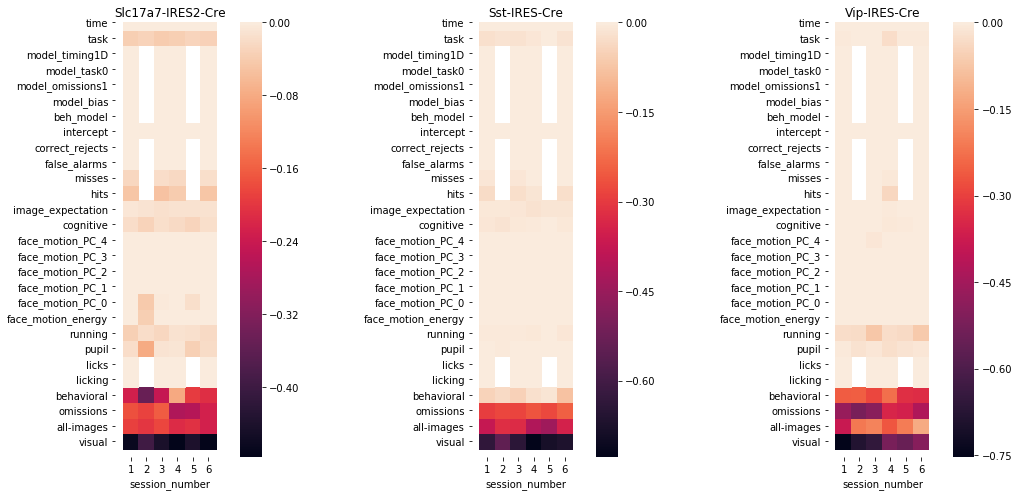

In [26]:
df = rspm[rspm.project_code.isin(['VisualBehavior', 'VisualBehaviorTask1B'])]

fig, ax = plt.subplots(1,3,figsize=(15,7))
ax = ax.ravel()
for i,cre_line in enumerate(np.sort(cre_lines)):
    tmp = df[df.cre_line==cre_line]
    ax[i] = sns.heatmap(data=tmp.groupby(['session_number']).median()[features_to_plot].T, 
                        ax=ax[i], square=True)
    ax[i].set_xlim(-0.5,len(tmp.session_number.unique())+0.5)
    ax[i].set_ylim(-0.5,len(features_to_plot)-0.5)
    ax[i].set_yticks(np.arange(0.5,len(features_to_plot)+0.5,1))
    ax[i].set_yticklabels(features_to_plot);
    ax[i].set_title(cre_line)
fig.tight_layout()

#### all project codes 

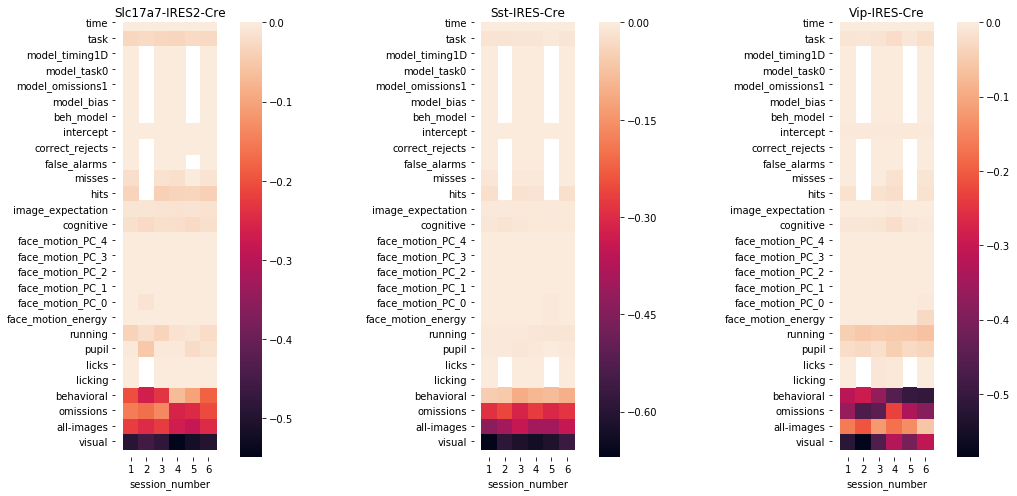

In [27]:
df = rspm.copy()

fig, ax = plt.subplots(1,3,figsize=(15,7))
for i,cre_line in enumerate(np.sort(cre_lines)):
    tmp = df[df.cre_line==cre_line]
    ax[i] = sns.heatmap(data=tmp.groupby(['session_number']).median()[features_to_plot].T, 
                        ax=ax[i], square=True)
    ax[i].set_xlim(-0.5,len(tmp.session_number.unique())+0.5)
    ax[i].set_ylim(-0.5,len(features_to_plot)-0.5)
    ax[i].set_yticks(np.arange(0.5,len(features_to_plot)+0.5,1))
    ax[i].set_yticklabels(features_to_plot);
    ax[i].set_title(cre_line)
fig.tight_layout()

### by session

In [28]:
# df = rspm[rspm.project_code.isin(['VisualBehavior', 'VisualBehaviorTask1B'])]


# for c,cre_line in enumerate(cre_lines):
#     tmp = df[(df.cre_line==cre_line)]
#     containers = np.sort(tmp.container_id.unique())
#     print(cre_line, len(containers))
#     fig, ax = plt.subplots(4,5, figsize=(20,20))
#     ax = ax.ravel()
#     for i,container_id in enumerate(containers):
#         cdf = tmp[(tmp.container_id==container_id)]
#         ax[i] = sns.heatmap(data=cdf.groupby(['session_number']).median()[features_to_plot].T, ax=ax[i])
#         ax[i].set_xlim(-0.5,len(cdf.session_number.unique())+0.5)
#         ax[i].set_ylim(-0.5,len(features_to_plot)-0.5)
#         ax[i].set_yticks(np.arange(0.5,len(features_to_plot)+0.5,1))
#         ax[i].set_yticklabels(features_to_plot);
#         ax[i].set_title(cre_line+' '+str(int(cdf.imaging_depth.mean()))+'\n'+str(container_id))
#     fig.tight_layout()

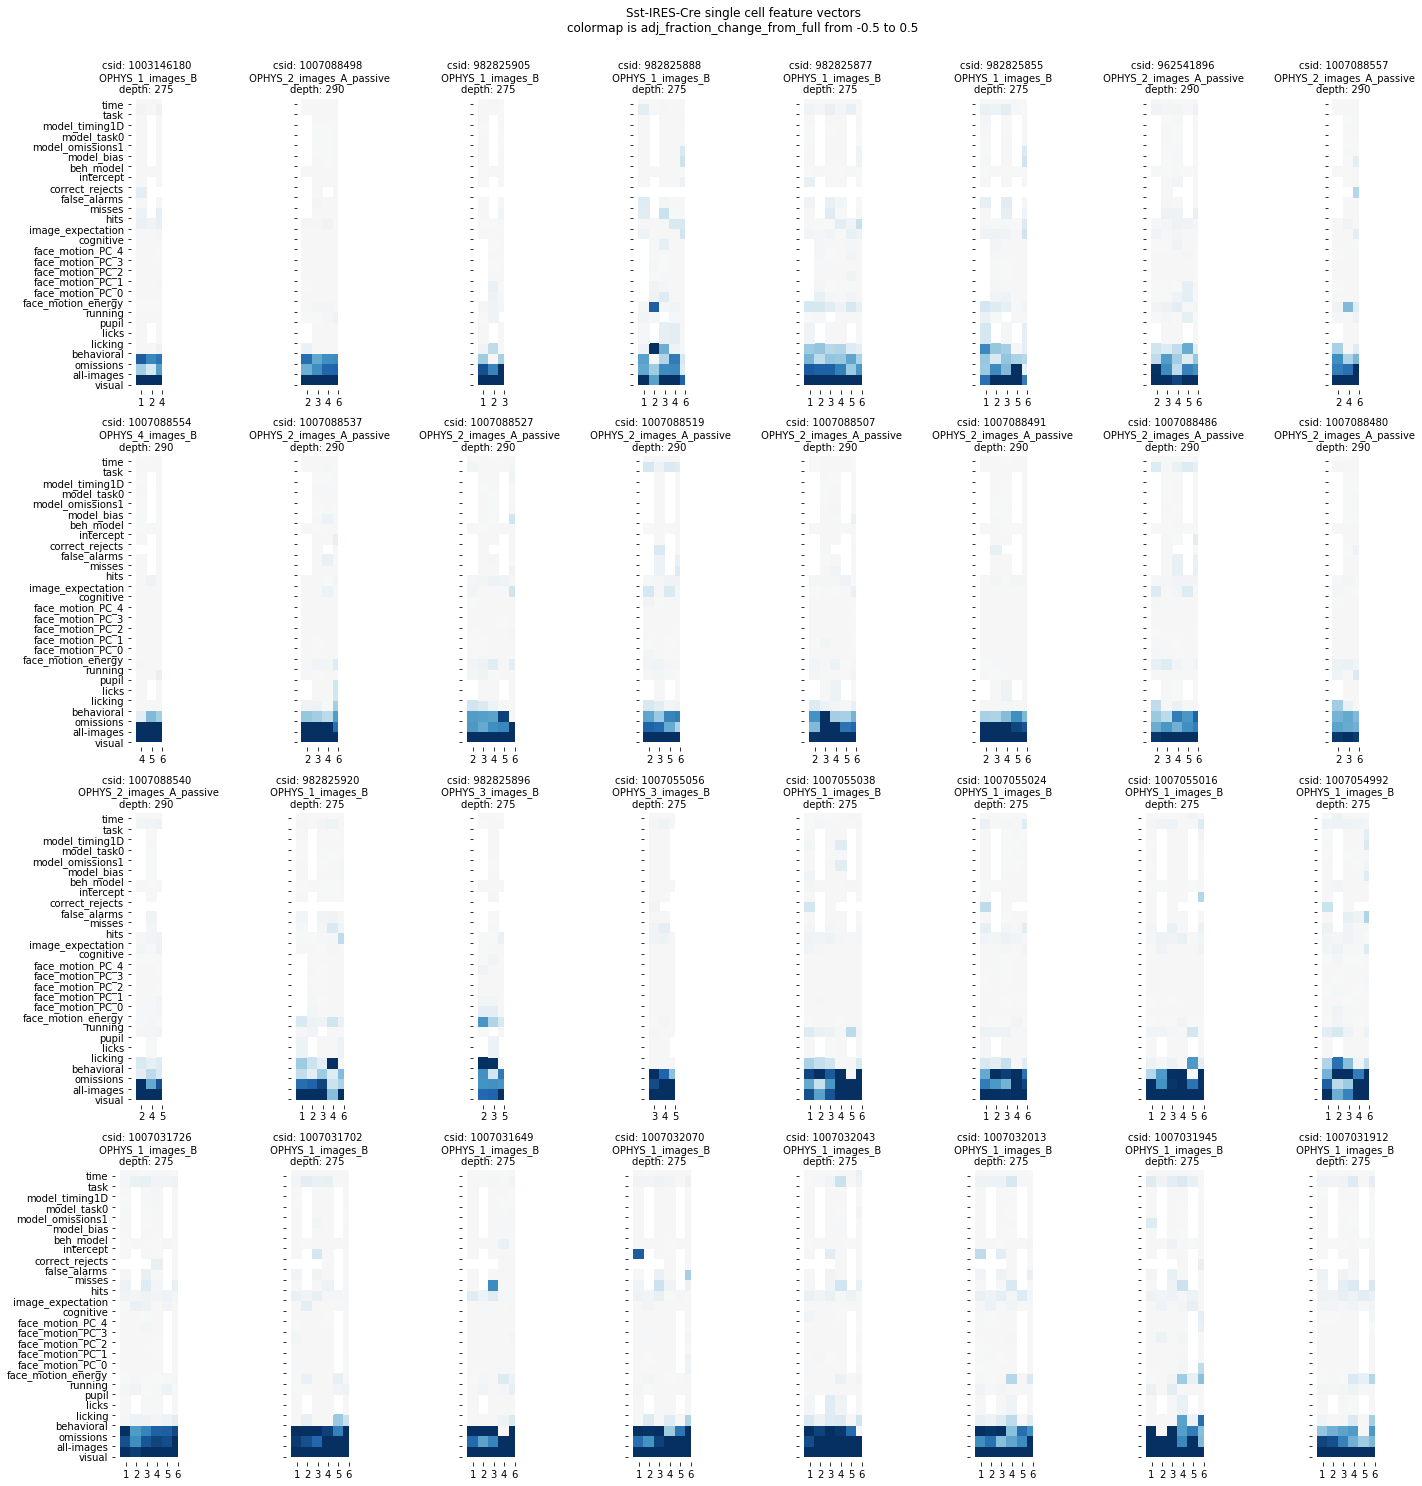

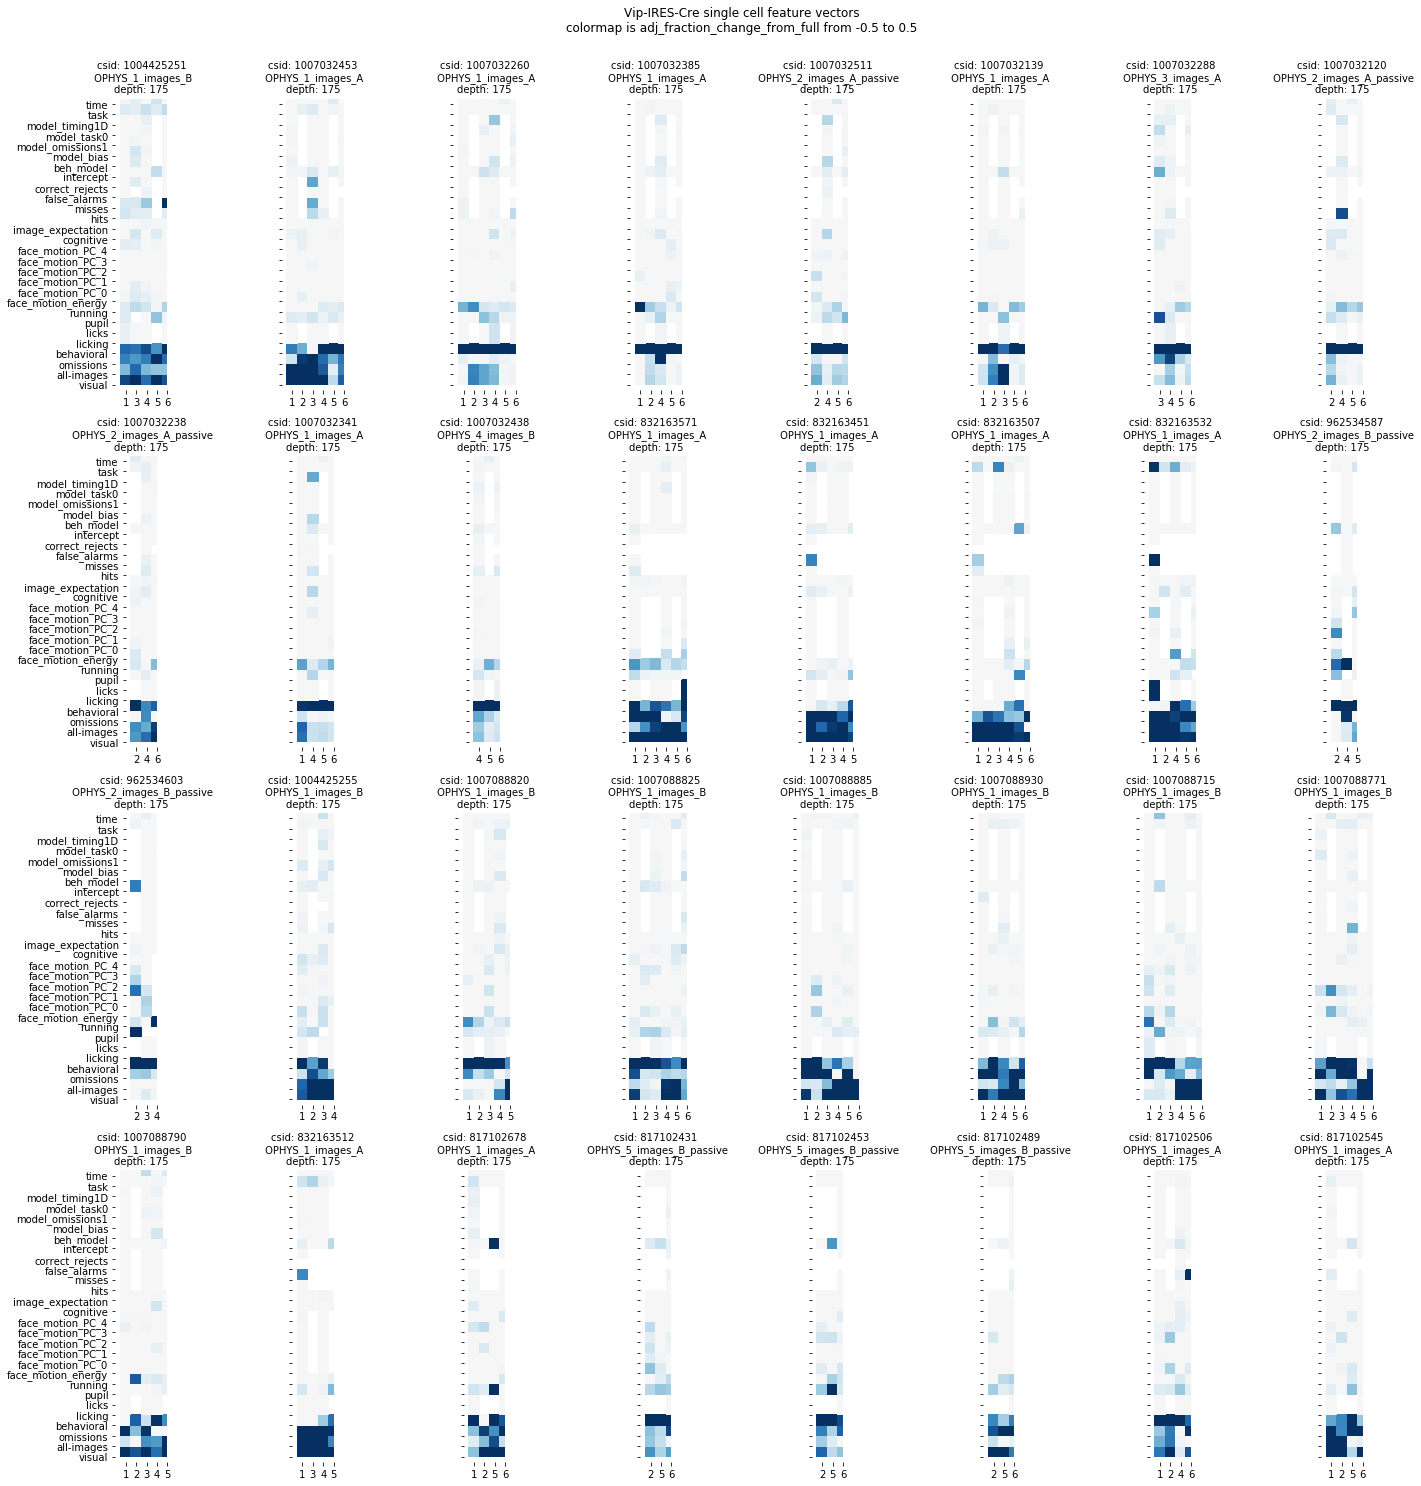

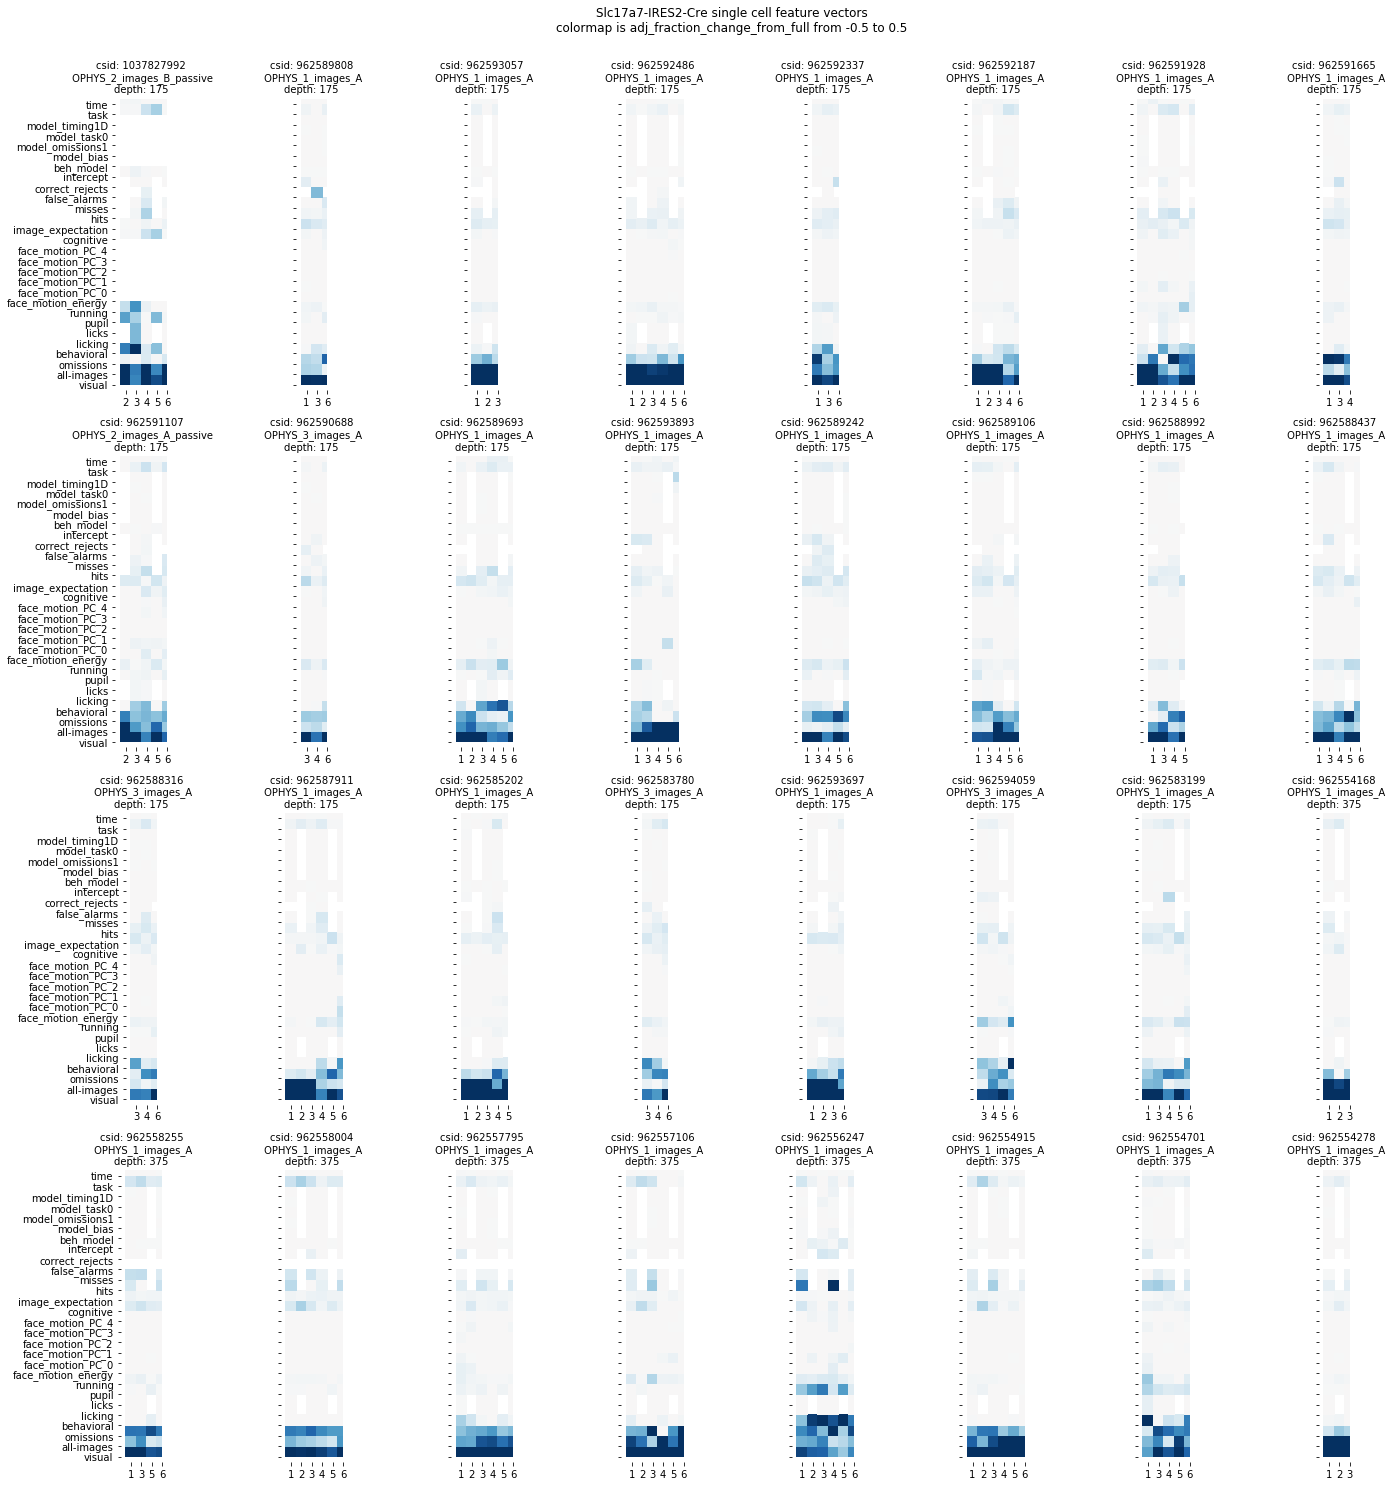

In [29]:
session_numbers = np.sort(df.session_number.unique())

for cre_line in cre_lines: 
    nrows = 4 
    ncols = 8
    fig, ax = plt.subplots(nrows,ncols, figsize=(20,20), sharey=True)
    ax = ax.ravel()
    cre_df = df[df.cell_specimen_id.isin(matched_cells)&(df.cre_line==cre_line)]
    cre_df = cre_df.sort_values(by='Full', ascending=False)
    cre_matched_cells = cre_df.cell_specimen_id.unique()

    for i,cell_specimen_id in enumerate(cre_matched_cells[:(nrows*ncols)]):
        cdf = df[df.cell_specimen_id==cell_specimen_id]
        ax[i] = sns.heatmap(data=cdf.set_index('session_number')[features_to_plot].sort_values(by='session_number').T, 
                            vmin=-0.5, vmax=0.5, cmap='RdBu_r', square=True, ax=ax[i], cbar=False)
        ax[i].set_xlim(-0.5,len(cdf)-0.5)
        ax[i].set_xlabel('')
        ax[i].set_ylim(-0.5,len(features_to_plot)-0.5)
        ax[i].set_yticks(np.arange(0,len(features_to_plot),1))
        ax[i].set_yticklabels(features_to_plot)
        ax[i].set_title('csid: '+str(cell_specimen_id)+'\n '+cdf.session_type.values[0]+'\ndepth: '+str(int(cdf.imaging_depth.mean())), fontsize=10)

#     for y in np.arange(0,nrows*ncols,ncols):
#         ax[y].set_xlabel('session #', fontsize=10)

#     for x in range(nrows):
#         ax[(nrows*ncols-x)-1].set_yticks(np.arange(len(features_to_plot)))  
#         ax[(nrows*ncols-x)-1].set_yticklabels(features_to_plot, rotation=0)

    plt.suptitle(cre_line+' single cell feature vectors\ncolormap is '+model_output_type+' from -0.5 to 0.5', x=0.52, y=1.03, horizontalalignment='center')
    fig.tight_layout()

### basic characterization 

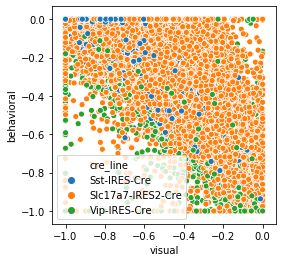

In [30]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=rspm, x='visual', y='behavioral', hue='cre_line', ax=ax)


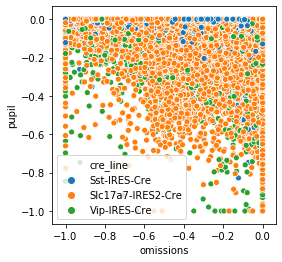

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=rspm, x='omissions', y='pupil', hue='cre_line', ax=ax)


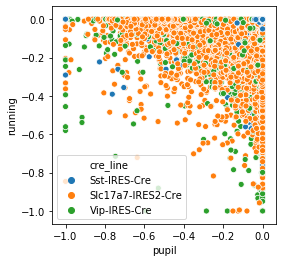

In [32]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(data=rspm, x='pupil', y='running', hue='cre_line', ax=ax)


In [33]:
colors = sns.color_palette()
colors = [colors[0], colors[2], colors[3]]
cre_lines = np.sort(rspm.cre_line.unique())

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


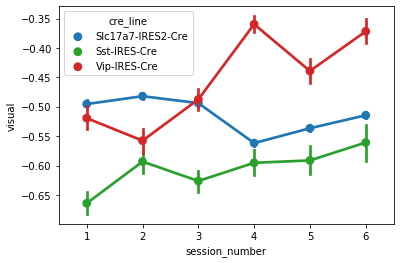

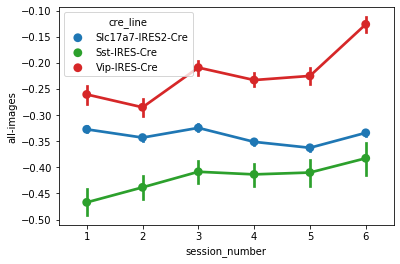

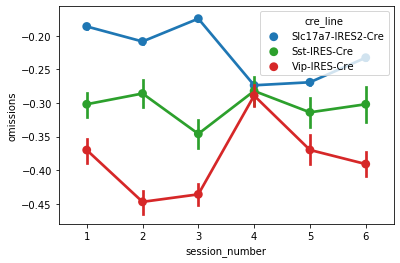

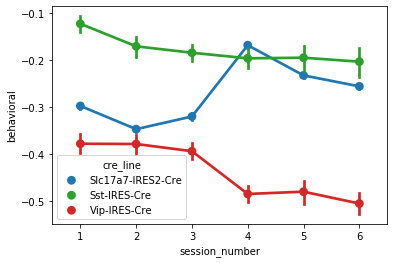

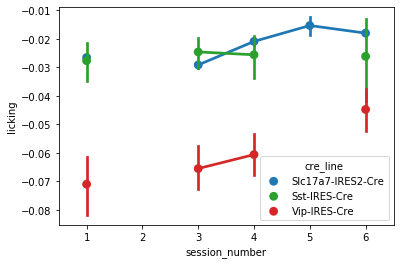

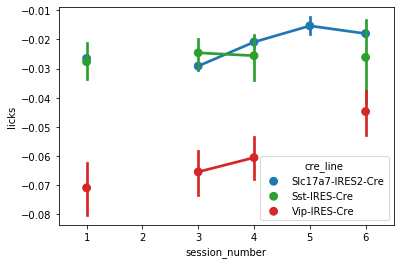

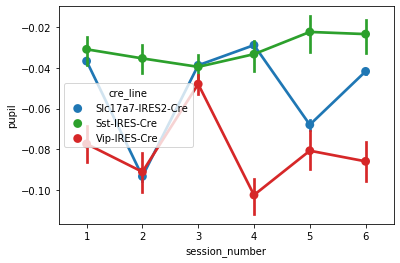

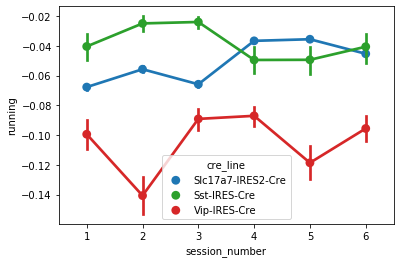

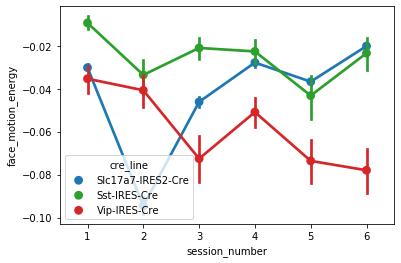

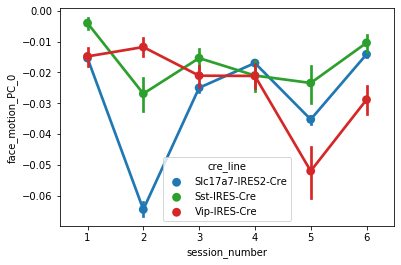

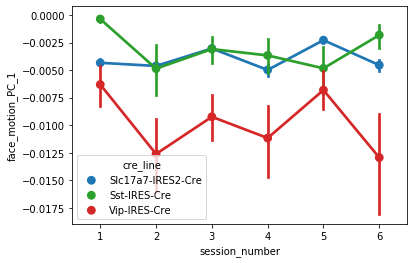

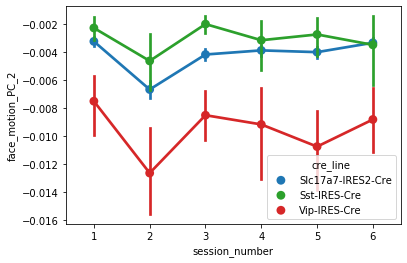

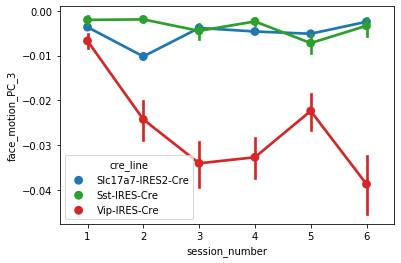

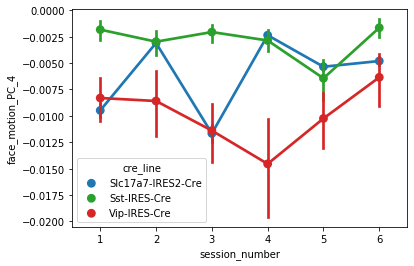

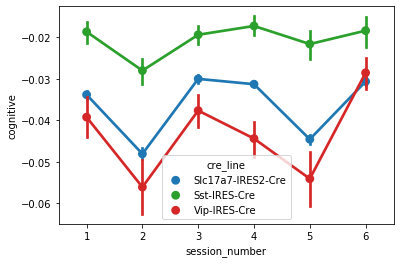

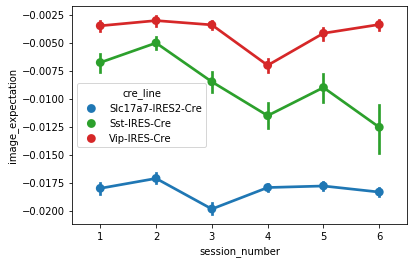

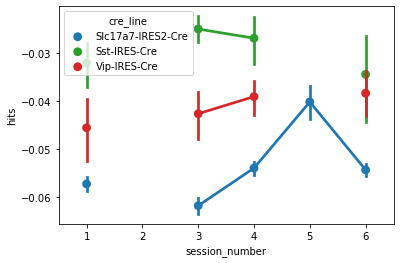

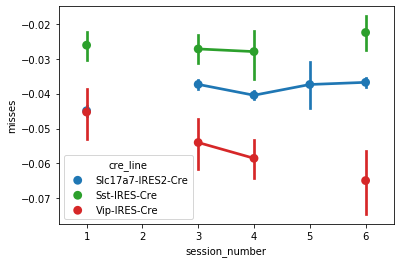

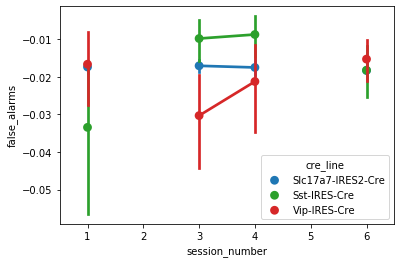

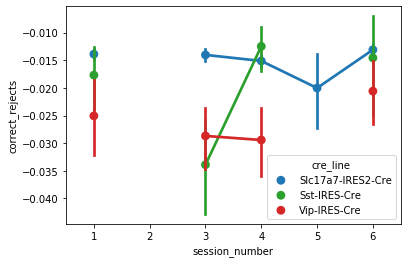

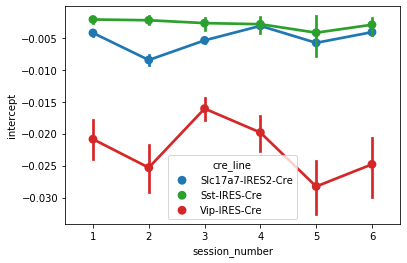

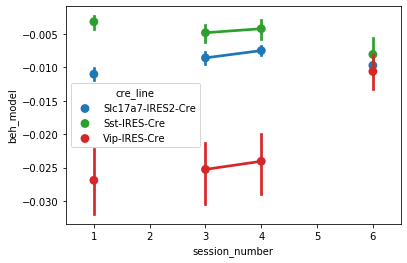

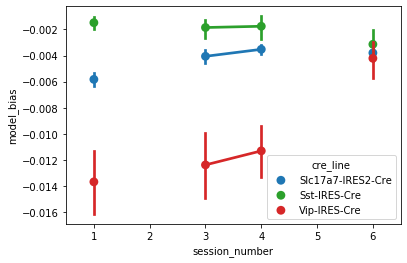

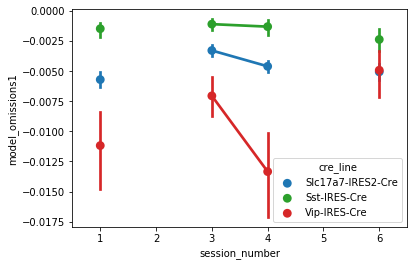

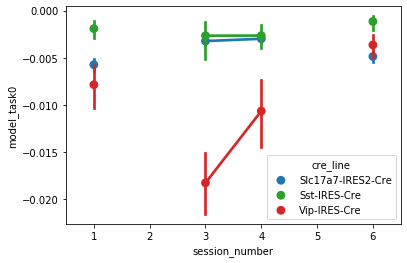

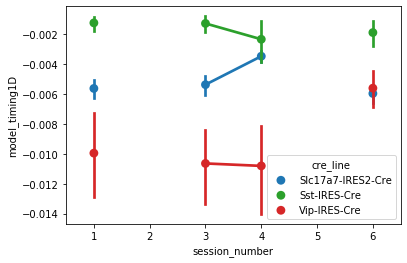

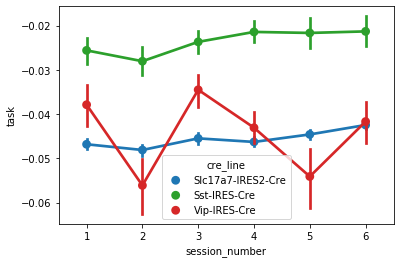

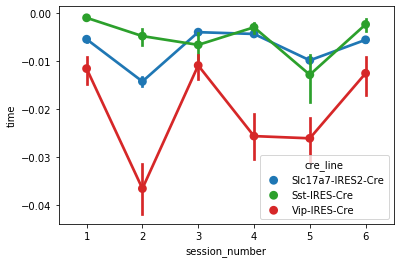

In [34]:
for metric in features_to_plot:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.pointplot(data=rspm, x='session_number', y=metric, hue='cre_line', hue_order=cre_lines, palette=colors, ax=ax)

In [35]:
cre_lines = np.sort(rspm.cre_line.unique())
session_numbers = np.sort(rspm.session_number.unique())

cre_line = cre_lines[0]
session_number = session_numbers[0]

In [36]:
def get_colors_for_session_numbers():
    reds = sns.color_palette('Reds_r', 6)[::2]
    blues = sns.color_palette('Blues_r', 6)[::2]
    return reds + blues

In [37]:
colors = get_colors_for_session_numbers()
# colors = [c[0], c[2], c[3], c[5]]

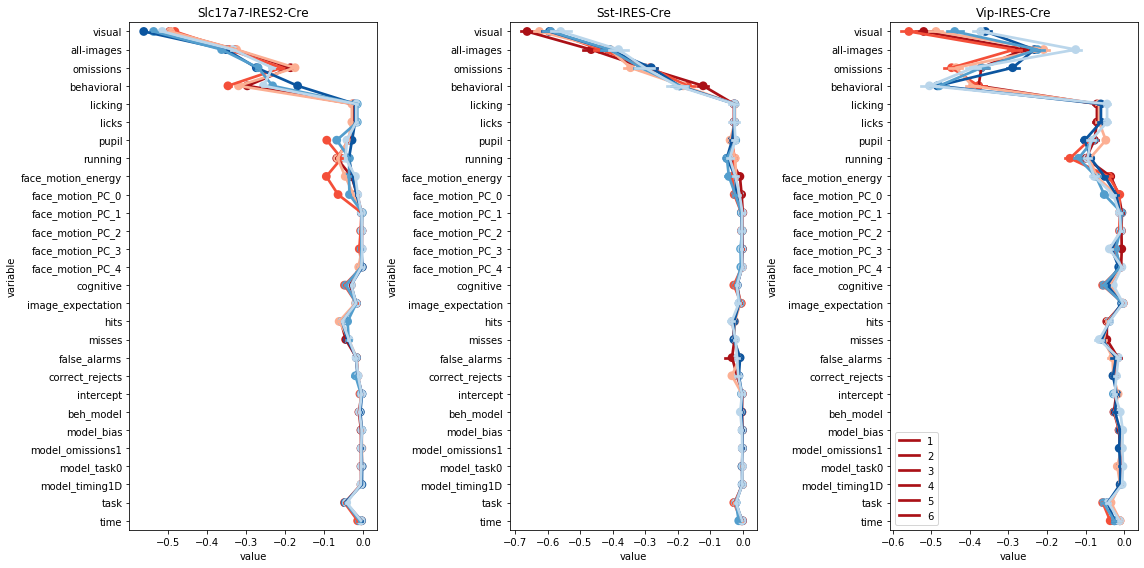

In [38]:
colors = get_colors_for_session_numbers()
fig, ax = plt.subplots(1,3, figsize=(16, 8))
for i,cre_line in enumerate(cre_lines): 
    for c,session_number in enumerate(session_numbers): 
        data = rspm[(rspm.cre_line==cre_line)&(rspm.session_number==session_number)][features_to_plot].melt()
        ax[i] = sns.pointplot(data=data, x='value', y='variable', ax=ax[i], color=colors[c], )
    ax[i].set_title(cre_line)
plt.legend(labels=session_numbers)
fig.tight_layout()

### PCA on the feature matrix 

In [39]:
from sklearn.decomposition import PCA

In [58]:
rspm.head()

,identifier,Full,all-images,beh_model,behavioral,cognitive,correct_rejects,expectation,face_motion_PC_0,face_motion_PC_1,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
0,1000743008_1003146172,0.0,-0.131169,-0.003489,-0.251514,-0.025145,-0.009547,-0.057581,-0.053424,-0.005941,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
1,1000743008_1003146180,0.0,-0.172658,0.000000,0.000000,-0.006048,0.000000,-0.066927,0.000000,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
2,1000743008_1003146183,0.0,-0.256476,0.000000,-0.136978,-0.011285,0.000000,-0.046704,-0.016123,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
3,1000743008_1003146186,0.0,-0.413599,0.000000,0.000000,0.000000,0.000000,-0.040592,-0.000053,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
4,1000743008_1003146190,0.0,-0.097979,-0.001260,-0.053031,-0.013947,0.000000,-0.053520,-0.036129,0.000000,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1


In [42]:
data = rspm[features_to_plot+['cre_line','identifier']].copy()
data = data.dropna()
n_features = len(features_to_plot)
n_components = len(features_to_plot)
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data[features_to_plot].values)
data['pc1'] = pca_result[:,0]
data['pc2'] = pca_result[:,1] 
data['pc3'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
 

Explained variation per principal component: [6.24197327e-01 1.69758491e-01 7.30546635e-02 2.44117657e-02
 1.48393588e-02 1.35767214e-02 1.19709517e-02 1.07308953e-02
 1.00875166e-02 9.59638447e-03 8.55804751e-03 6.45289212e-03
 5.43660695e-03 3.43540802e-03 2.15989204e-03 1.90179544e-03
 1.83855364e-03 1.46937843e-03 1.18550390e-03 1.02183326e-03
 9.06291437e-04 8.41454911e-04 6.25502288e-04 6.08105704e-04
 4.97773192e-04 4.29932343e-04 4.06952667e-04 3.64544500e-33]


### plot explained variance for PCs

In [43]:
np.cumsum(pca.explained_variance_ratio_)

array([0.62419733, 0.79395582, 0.86701048, 0.89142225, 0.90626161,
       0.91983833, 0.93180928, 0.94254018, 0.95262769, 0.96222408,
       0.97078212, 0.97723502, 0.98267162, 0.98610703, 0.98826692,
       0.99016872, 0.99200727, 0.99347665, 0.99466215, 0.99568399,
       0.99659028, 0.99743173, 0.99805724, 0.99866534, 0.99916311,
       0.99959305, 1.        , 1.        ])

In [44]:
np.searchsorted(np.cumsum(pca.explained_variance_ratio_), .90)

4

In [45]:
np.searchsorted(np.cumsum(pca.explained_variance_ratio_), .95)

8

Text(0.5, 1.0, 'first 8 PCs explain >95% of the variance')

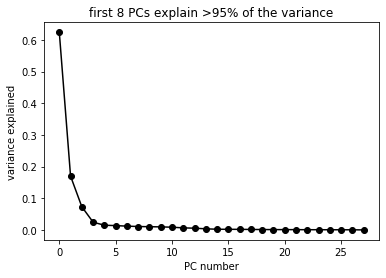

In [46]:
fig,ax=plt.subplots()
ax.plot(
    np.arange(n_components),
    pca.explained_variance_ratio_,
    'o-k'
)
ax.set_xlabel('PC number')
ax.set_ylabel('variance explained')
ax.set_title('first 8 PCs explain >95% of the variance')

### what are the PCs? 

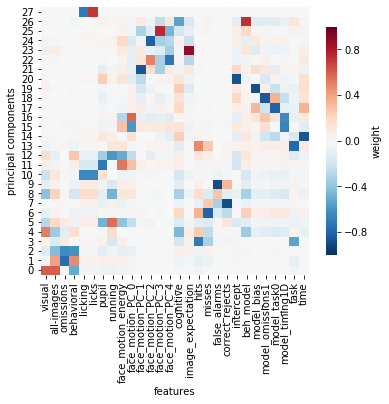

In [47]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(pca.components_, vmin=-1, vmax=1, cmap='RdBu_r', ax=ax, square=True,
                 robust=True, cbar_kws={"drawedges": False, "shrink": 0.7, "label": 'weight'})
ax.set_ylabel('principal components')
ax.set_xlabel('features')
# ax.set_title('principal axes in feature space \n(directions of maximum variance in the data)')
ax.set_ylim(0, n_components)
ax.set_xticks(np.arange(0.5, len(features_to_plot)+0.5, 1))
ax.set_xticklabels(features_to_plot, rotation=90);

In [48]:
pca.components_.shape

(28, 28)

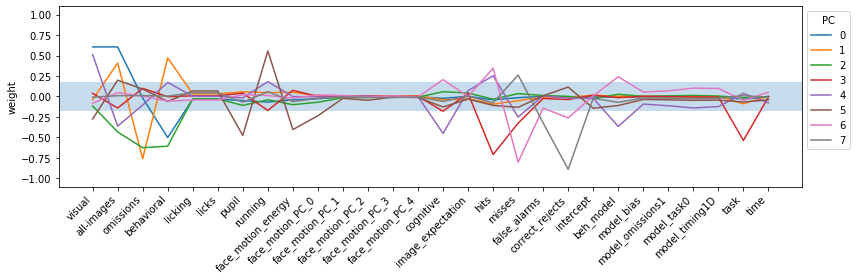

In [49]:
fig,ax=plt.subplots(figsize=(12,4))
N_PCs = 8
for PC in range(N_PCs):
    ax.plot(pca.components_[PC,:])
ax.legend(np.arange(N_PCs), title='PC', bbox_to_anchor=(1,1))
ax.axhspan(1/np.sqrt(32), -1/np.sqrt(32), zorder=-np.inf, alpha=0.25)
ax.set_xticks(np.arange(len(features_to_plot)))
ax.set_xticklabels(features_to_plot, rotation=45, ha='right')
ax.set_ylabel('weight')
ax.set_ylim(-1.1,1.1)
fig.tight_layout()


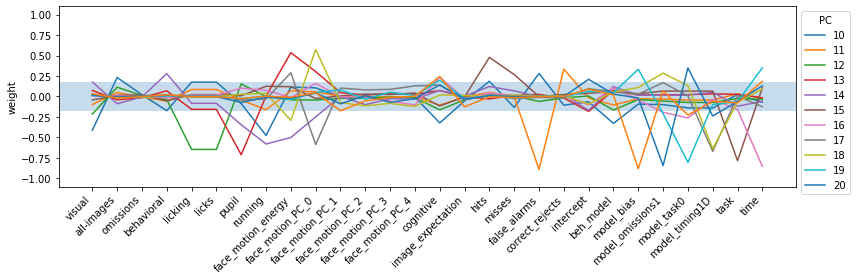

In [50]:
fig,ax=plt.subplots(figsize=(12,4))
for PC in range(8,20):
    ax.plot(pca.components_[PC,:])
ax.legend(np.arange(10,21), title='PC', bbox_to_anchor=(1,1))
ax.axhspan(1/np.sqrt(32), -1/np.sqrt(32), zorder=-np.inf, alpha=0.25)
ax.set_xticks(np.arange(len(features_to_plot)))
ax.set_xticklabels(features_to_plot, rotation=45, ha='right')
ax.set_ylabel('weight')
ax.set_ylim(-1.1,1.1)
fig.tight_layout()


### plot covariance matrix 

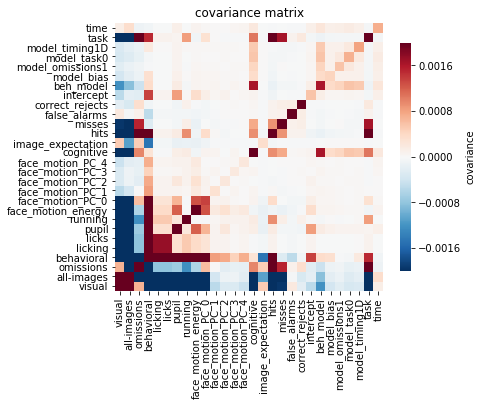

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(pca.get_covariance(), vmin=-0.002, vmax=0.002, cmap='RdBu_r', ax=ax, square=True,
                 robust=True, cbar_kws={"drawedges": False, "shrink": 0.7, "label": 'covariance'})
ax.set_title('covariance matrix')
ax.set_ylim(0, n_features)
ax.set_xticks(np.arange(0.5, len(features_to_plot)+0.5, 1))
ax.set_xticklabels(features_to_plot, rotation=90);
ax.set_yticklabels(features_to_plot, rotation=0);

### plot PCA result 

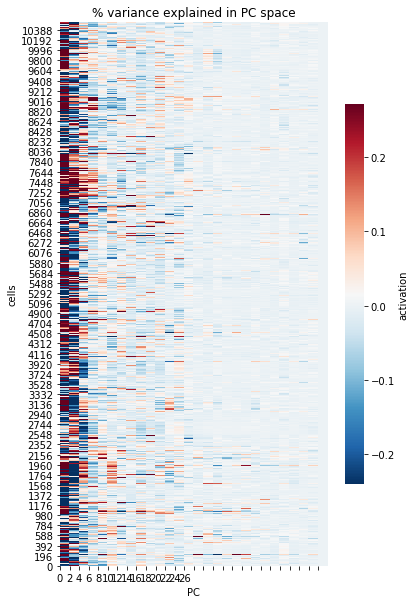

In [52]:
fig, ax = plt.subplots(figsize=(6,10))
ax = sns.heatmap(pca_result, cmap='RdBu_r', ax=ax, 
                 robust=True, cbar_kws={"drawedges": False, "shrink": 0.7, "label": 'activation'})
ax.set_ylabel('cells')
ax.set_xlabel('PC')
ax.set_title('% variance explained in PC space')
ax.set_ylim(0, pca_result.shape[0])
ax.set_xlim(0, pca_result.shape[1])
ax.set_xticks(np.arange(0, pca_result.shape[1]));
# ax.set_xticklabels(features_to_plot, rotation=90);

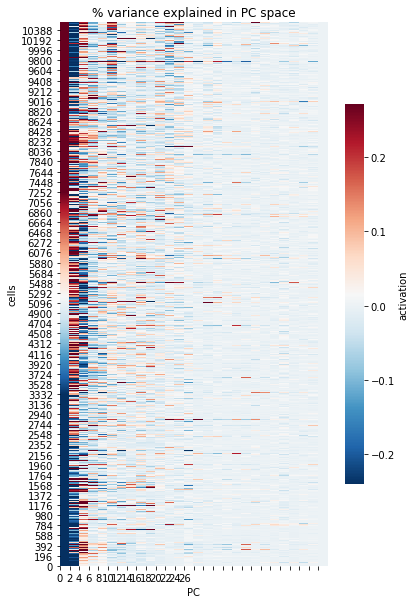

In [53]:
fig, ax = plt.subplots(figsize=(6,10))
ax = sns.heatmap(pca_result[np.argsort(pca_result[:,0])], cmap='RdBu_r', ax=ax, 
                 robust=True, cbar_kws={"drawedges": False, "shrink": 0.7, "label": 'activation'})
ax.set_ylabel('cells')
ax.set_xlabel('PC')
ax.set_title('% variance explained in PC space')
ax.set_ylim(0, pca_result.shape[0])
ax.set_xlim(0, pca_result.shape[1])
ax.set_xticks(np.arange(0, pca_result.shape[1]));

### plot data in PC space

In [54]:
data.keys()

Index(['visual', 'all-images', 'omissions', 'behavioral', 'licking', 'licks',
       'pupil', 'running', 'face_motion_energy', 'face_motion_PC_0',
       'face_motion_PC_1', 'face_motion_PC_2', 'face_motion_PC_3',
       'face_motion_PC_4', 'cognitive', 'image_expectation', 'hits', 'misses',
       'false_alarms', 'correct_rejects', 'intercept', 'beh_model',
       'model_bias', 'model_omissions1', 'model_task0', 'model_timing1D',
       'task', 'time', 'cre_line', 'identifier', 'pc1', 'pc2', 'pc3'],
      dtype='object')

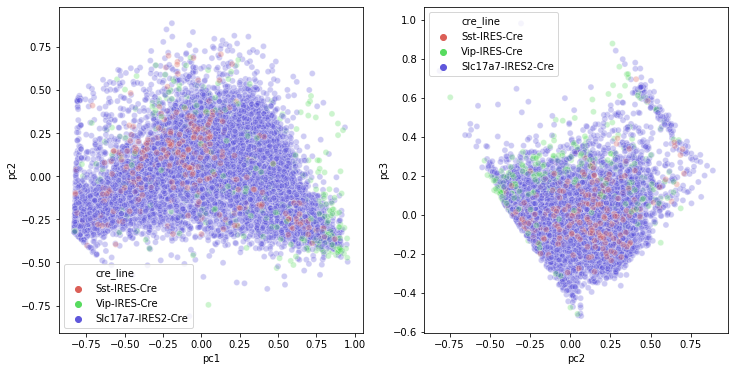

In [55]:
# pc1 and pc2 columns in rspm correspond to pca_results for those PCs - is this the 'score' per cell? 
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0] = sns.scatterplot(data=data, x="pc1", y="pc2", hue="cre_line",
    palette=sns.color_palette("hls", 3), legend="full", alpha=0.3, ax=ax[0])
# ax[0].set_xlim(-5,10)
# ax[0].set_ylim(-5,10)

ax[1] = sns.scatterplot(data=data, x="pc2", y="pc3", hue="cre_line",
    palette=sns.color_palette("hls", 3), legend="full", alpha=0.3, ax=ax[1])
# ax[1].set_xlim(-5,10)
# ax[1].set_ylim(-5,10)

In [56]:
pca_result_df = pd.DataFrame(pca_result, index=data.identifier)
pca_result_df['cre_line'] = data['cre_line'].values

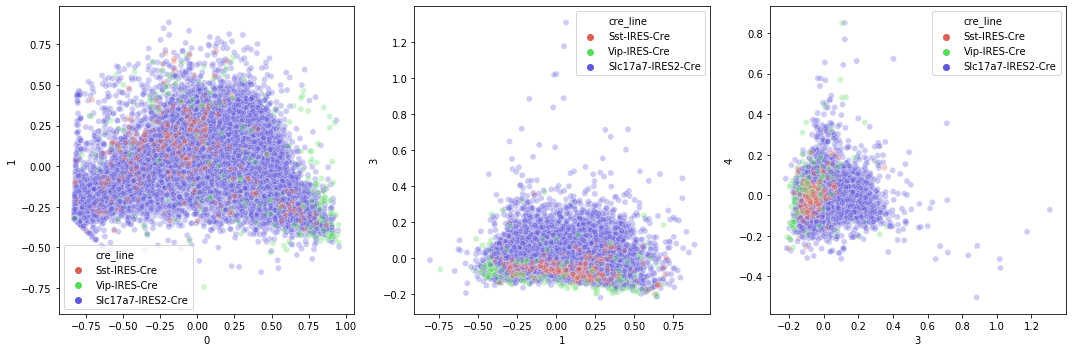

In [57]:
# pc1 and pc2 columns in rspm correspond to pca_results for those PCs - is this the 'score' per cell? 

PC1 = 0
PC2 = 1
PC3 = 3
PC4 = 4

fig,ax = plt.subplots(1, 3, figsize=(15,5))
ax = ax.ravel()
i=0
ax[i] = sns.scatterplot(data=pca_result_df, x=PC1, y=PC2, hue="cre_line",
    palette=sns.color_palette("hls", 3), legend="full", alpha=0.3, ax=ax[i])
# ax[i].set_xlim(-100,100)
# ax[i].set_ylim(-100,100)
i+=1
ax[i] = sns.scatterplot(data=pca_result_df, x=PC2, y=PC3, hue="cre_line",
    palette=sns.color_palette("hls", 3), legend="full", alpha=0.3, ax=ax[i])
# ax[i].set_xlim(-100,100)
# ax[i].set_ylim(-100,100)
i+=1
ax[i] = sns.scatterplot(data=pca_result_df, x=PC3, y=PC4, hue="cre_line",
    palette=sns.color_palette("hls", 3), legend="full", alpha=0.3, ax=ax[i])
# ax[i].set_xlim(-100,100)
# ax[i].set_ylim(-100,100)

fig.tight_layout()

### PCs per cre line

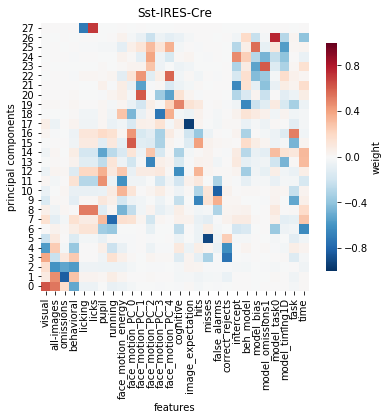

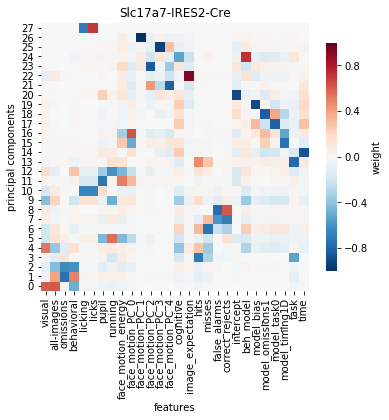

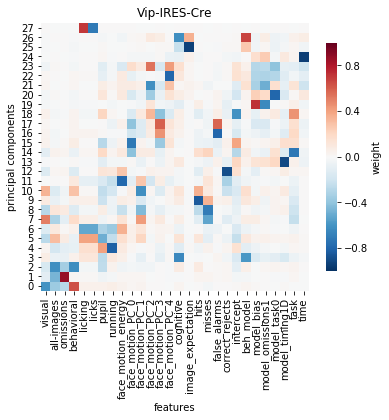

In [63]:
for cre_line in rspm.cre_line.unique():
    
    data = rspm[features_to_plot+['cre_line','identifier']].copy()
    data = data[data.cre_line==cre_line]
    data = data.dropna()
    n_features = len(features_to_plot)
    n_components = len(features_to_plot)
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data[features_to_plot].values)
    data['pc1'] = pca_result[:,0]
    data['pc2'] = pca_result[:,1] 
    data['pc3'] = pca_result[:,2]
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(pca.components_, vmin=-1, vmax=1, cmap='RdBu_r', ax=ax, square=True,
                     robust=True, cbar_kws={"drawedges": False, "shrink": 0.7, "label": 'weight'})
    ax.set_ylabel('principal components')
    ax.set_xlabel('features')
    ax.set_title(cre_line)
    ax.set_ylim(0, n_components)
    ax.set_xticks(np.arange(0.5, len(features_to_plot)+0.5, 1))
    ax.set_xticklabels(features_to_plot, rotation=90);
    